### A Machine Learning Project
#### A Complete ML Project including Dimension Reduction (PCA, LDA, FA), Classification (KNN, DT, SVM), Validation (Cross Validation, Hold-Out), Clustering (K-Means, GMM), Evaluation (Purity, Rand-Index, Mutual-Information)

##### importing data

In [77]:
import pandas as pd
import numpy as np

train = pd.read_csv("../data/MLP2019/train.csv") 
test = pd.read_csv("../data/MLP2019/test.csv") 

In [78]:
train.head(5)

,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,WALKING_DOWNSTAIRS,0.110,-0.0243,-0.1420,0.3500,0.296,-0.3360,0.267,0.148,-0.3790,...,-0.0968,-0.432,-0.760,0.8080,-0.891,-0.820,0.0156,-0.816,0.1990,-0.0627
1,SITTING,0.119,0.1520,-0.1340,-0.8710,-0.431,-0.8560,-0.870,-0.388,-0.8600,...,-0.1640,-0.266,-0.702,0.1150,0.262,0.334,-0.3160,-0.767,-0.0386,-0.0764
2,STANDING,0.278,-0.0166,-0.1010,-0.9970,-0.987,-0.9900,-0.997,-0.988,-0.9890,...,0.2630,-0.489,-0.801,-0.1770,-0.180,0.801,-0.3210,-0.667,0.1980,-0.1970
3,WALKING_UPSTAIRS,0.250,0.0215,-0.0976,-0.0841,0.141,-0.0379,-0.150,0.174,-0.0869,...,0.1960,-0.435,-0.791,0.4130,0.443,-0.815,0.1980,-0.564,0.3290,0.2130
4,SITTING,0.278,-0.0161,-0.1110,-0.9970,-0.991,-0.9940,-0.997,-0.990,-0.9930,...,0.4730,-0.842,-0.974,-0.0885,0.129,0.091,0.0920,-0.613,-0.1580,-0.0702


In [79]:
test.head(5)

,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,0.201,0.0124,-0.1780,-0.272,-0.315,-0.241,-0.347,-0.341,-0.211,0.0635,...,-0.0687,-0.0422,-0.4380,0.3710,-0.804,-0.974,0.729,-0.881,0.0575,-0.0596
1,0.340,-0.0384,-0.0997,-0.310,0.301,-0.459,-0.340,0.290,-0.435,-0.1490,...,0.0856,0.1000,-0.1550,-0.7730,0.347,-0.709,-0.193,-0.596,0.3770,0.0256
2,0.193,-0.0229,-0.1080,-0.145,-0.242,-0.243,-0.172,-0.297,-0.288,-0.0855,...,0.1580,-0.1550,-0.5230,0.8210,0.480,0.159,-0.312,-0.863,0.1870,0.0522
3,0.071,-0.0421,0.0823,-0.776,-0.664,-0.250,-0.800,-0.704,-0.235,-0.9070,...,0.1340,0.3830,0.0773,-0.1480,0.389,0.241,-0.106,0.249,-0.4250,-0.5050
4,0.254,-0.0203,-0.0988,-0.990,-0.979,-0.985,-0.992,-0.982,-0.984,-0.9420,...,0.2790,-0.5540,-0.8730,-0.0195,-0.204,-0.302,0.431,0.354,-0.3690,-0.6030


In [80]:
print("shape of train: ", train.shape, "shape of test: ", test.shape)

shape of train:  (3409, 562) shape of test:  (200, 561)


In [81]:
train.activity.unique()

array(['WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'WALKING_UPSTAIRS',
       'WALKING', 'LAYING'], dtype=object)

In [82]:
train.activity.value_counts()

LAYING                646
STANDING              637
SITTING               590
WALKING               565
WALKING_UPSTAIRS      498
WALKING_DOWNSTAIRS    473
Name: activity, dtype: int64

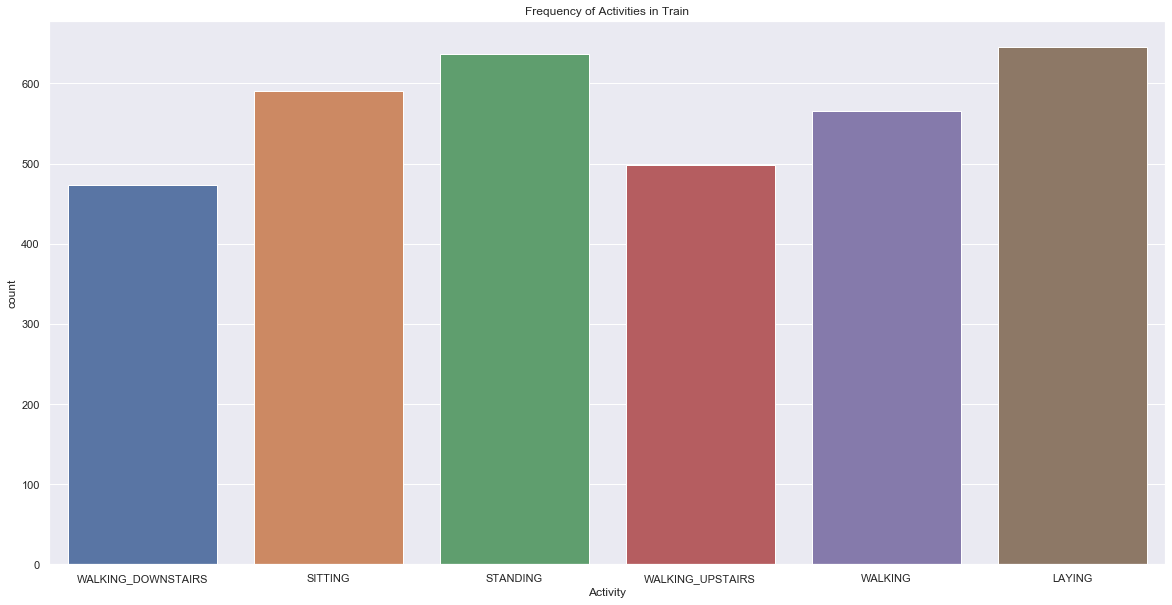

In [83]:
import seaborn

plt.figure(figsize = (20,10))
seaborn.countplot(train.activity)
plt.xlabel('Activity')
plt.ylabel('count')
plt.title('Frequency of Activities in Train')
plt.show()

In [84]:
from sklearn import metrics
from sklearn.mixture import GaussianMixture

Y_train = train.activity
train.pop('activity')
X_train = train
X_test = test

In [86]:
print('Y_train Shape: ', Y_train.shape, 'X_train Shape: ', X_train.shape, 'X_test Shape: ', X_test.shape)

Y_train Shape:  (3409,) X_train Shape:  (3409, 561) X_test Shape:  (200, 561)


In [87]:
def my_PCA(X, dnew):
    u, s, vh = np.linalg.svd(X, full_matrices=False)
    s = np.sqrt(s)
    s = np.diag(s)
    X = np.matmul(u, s)
    return X[:, 0:dnew]

In [89]:
X_train = my_PCA(X_train, 100)
X_test = my_PCA(X_test, 100)

In [96]:
print("Dimension Reduced X_train:\n", X_train, X_train.shape)
print("Dimension Reduced X_test:\n", X_test, X_test.shape)

Dimension Reduced X_train:
 [[-5.49087984e-02 -1.09840559e-01  3.20716526e-02 ...  6.02561819e-03
   2.68355938e-02  3.93331006e-02]
 [-1.01742381e-01  5.53476349e-04 -1.20113234e-01 ... -3.02153843e-02
   6.18213026e-03 -3.11264157e-03]
 [-1.13569662e-01  5.12909121e-02  7.09816180e-02 ...  1.86709825e-02
   1.00743498e-02 -3.83608825e-02]
 ...
 [-1.13099419e-01  4.25866875e-02  3.72381557e-02 ... -1.47767804e-02
   3.50371259e-02  2.67250553e-02]
 [-1.12401700e-01  4.58967653e-02  3.25202922e-02 ... -2.31200659e-02
  -4.33344753e-06  1.01133338e-02]
 [-1.10581390e-01  6.46228283e-02 -6.37153694e-02 ... -2.07907834e-02
   3.12553593e-02 -6.85250454e-03]] (3409, 100)
Dimension Reduced X_test:
 [[-0.22004819  0.20170856 -0.03105466 ...  0.0462404  -0.00163336
   0.04003466]
 [-0.22708113  0.21175708  0.07437006 ...  0.09057583  0.12707331
  -0.14746509]
 [-0.20901217  0.22572146 -0.15310487 ...  0.21235678 -0.03820371
   0.00245447]
 ...
 [-0.15870857  0.29280661 -0.05574082 ... -0.1491